# Simple test

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pytree import *
from test import *
import random
import matplotlib.pyplot as plt
print(__version__)
print(__git_version__)

0.0.5
55040ff6f76244888ccf905d7f6fef0321253750


In [3]:
random.seed(42)
dataset =  generate_dataset(0, 1, 30, 0, 10) +\
           generate_dataset(0, 2, 30, 10, 20) +\
           generate_dataset(20, 0.5, 30, 20, 30)

def add_normal_noise(dataset, sigma):
    return [(d[0], d[1] + random.gauss(0, sigma)) for d in dataset]

dataset = add_normal_noise(dataset, 1)

21.5 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
[9.572130722067811, 19.731157639793707]


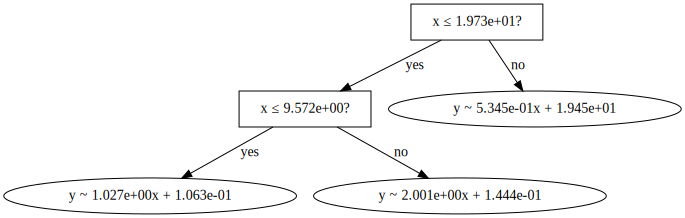

In [4]:
%timeit compute_regression(dataset)
reg = compute_regression(dataset)
print(reg.breakpoints)
reg.to_graphviz()

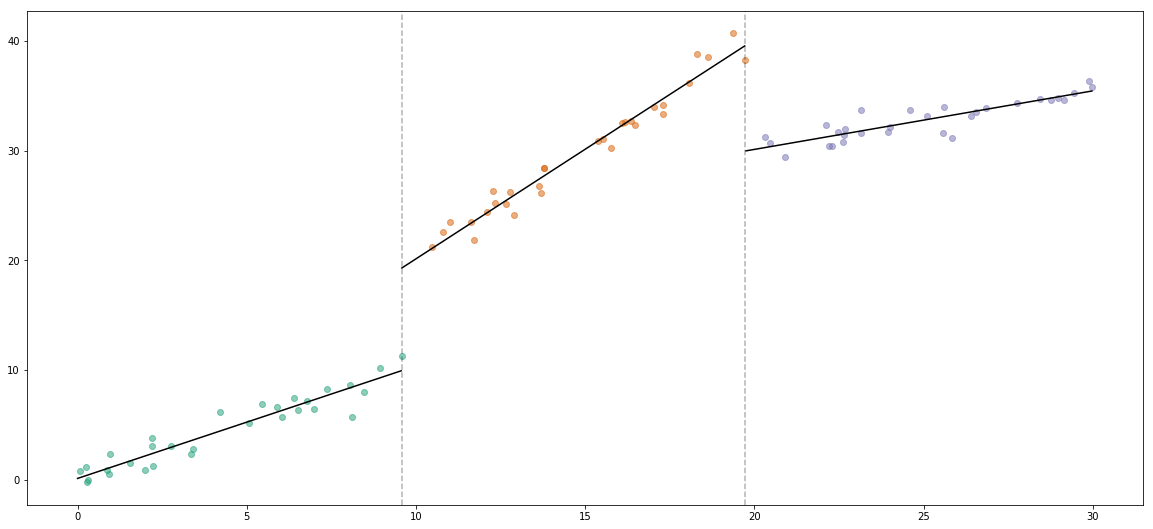

In [5]:
reg.plot_dataset()

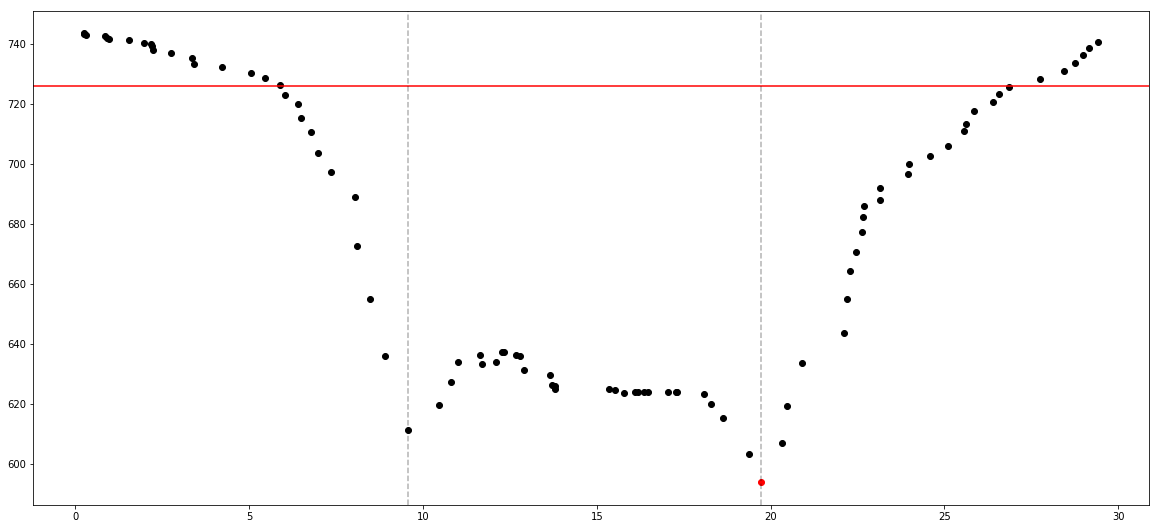

In [6]:
reg.plot_error()

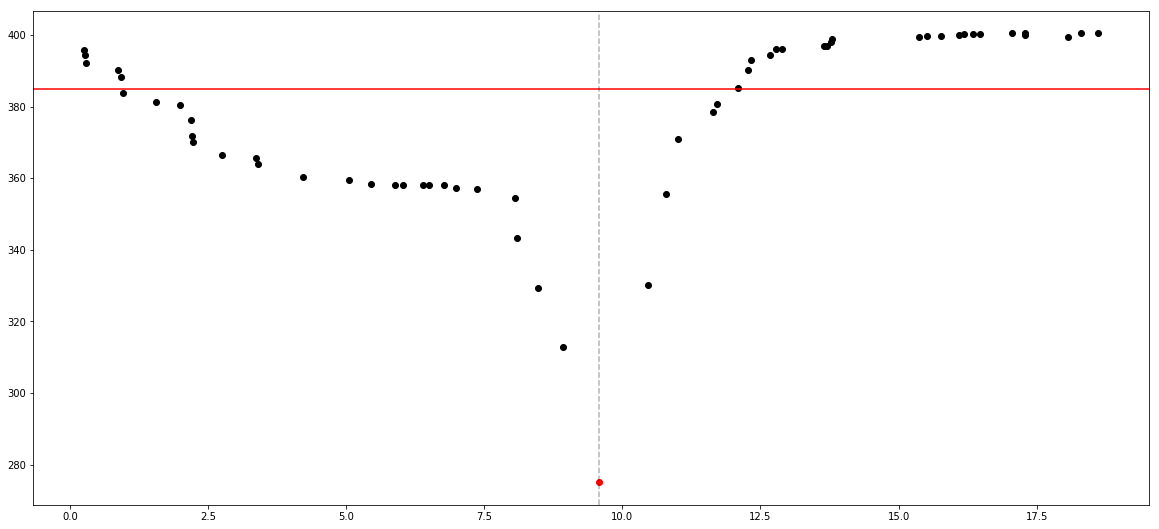

In [7]:
reg.left.plot_error()

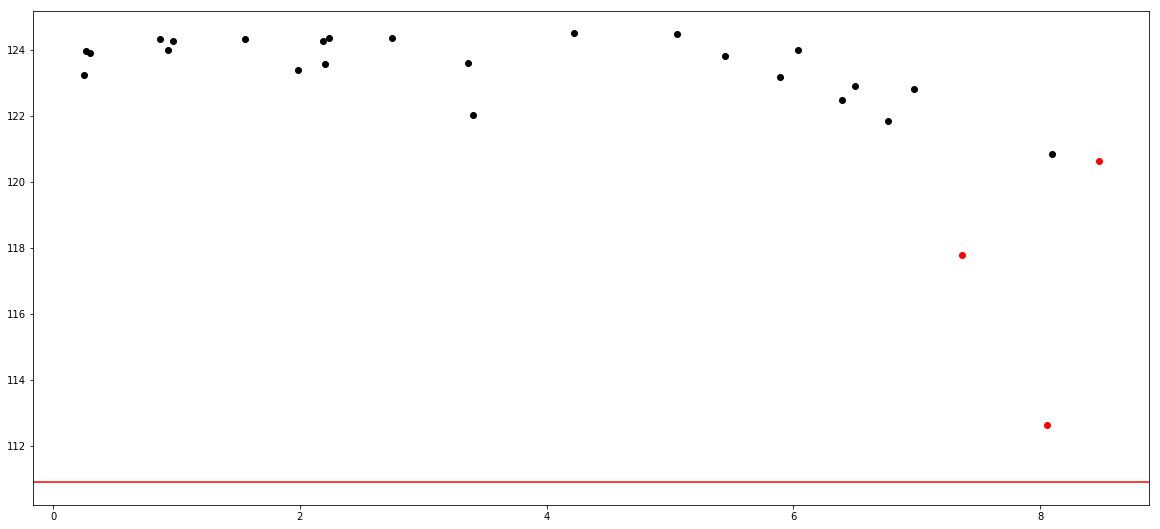

In [8]:
reg.left.left.plot_error()

In [9]:
dataset = []
for split in range(0, 100, 10):
    intercept = random.randint(1, 10)
    coeff = random.choice([0.5, 1, 1.5, 2, 2.5, 3])
    dataset += generate_dataset(intercept, coeff, 30, split, split+10)

dataset = add_normal_noise(dataset, 1)
random.shuffle(dataset)

In [10]:
%timeit compute_regression(dataset)
reg = compute_regression(dataset)
print(reg)
print(reg.breakpoints)

132 ms ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
x ≤ 8.988e+01?
    └──x ≤ 3.980e+01?
    │    └──x ≤ 1.995e+01?
    │    │    └──x ≤ 9.265e+00?
    │    │    │    └──y ~ 2.876e+00x + 1.447e+00
    │    │    │    └──y ~ 1.493e+00x + 7.968e+00
    │    │    └──x ≤ 2.984e+01?
    │    │         └──y ~ 9.803e-01x + 5.542e+00
    │    │         └──y ~ 5.011e-01x + 4.949e+00
    │    └──x ≤ 7.107e+01?
    │         └──x ≤ 5.984e+01?
    │         │    └──x ≤ 4.974e+01?
    │         │    │    └──y ~ 1.409e+00x + 5.316e+00
    │         │    │    └──y ~ 2.009e+00x + 3.548e+00
    │         │    └──x ≤ 6.949e+01?
    │         │         └──y ~ 2.527e+00x + 7.083e+00
    │         │         └──y ~ 3.835e+00x + -9.014e+01
    │         └──x ≤ 7.901e+01?
    │              └──y ~ 2.508e+00x + 3.176e+00
    │              └──y ~ 3.059e+00x + -2.272e+00
    └──y ~ 6.013e-01x + -5.091e-01
[9.265180735593333, 19.95422689492714, 29.838533102514823, 39.79797953828836, 49.738370226

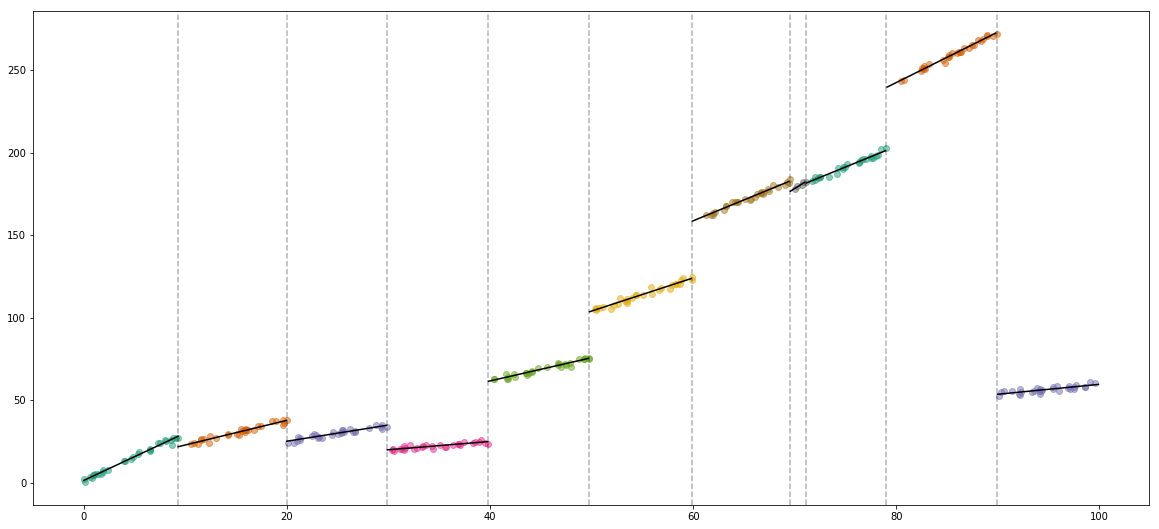

In [11]:
reg.plot_dataset()

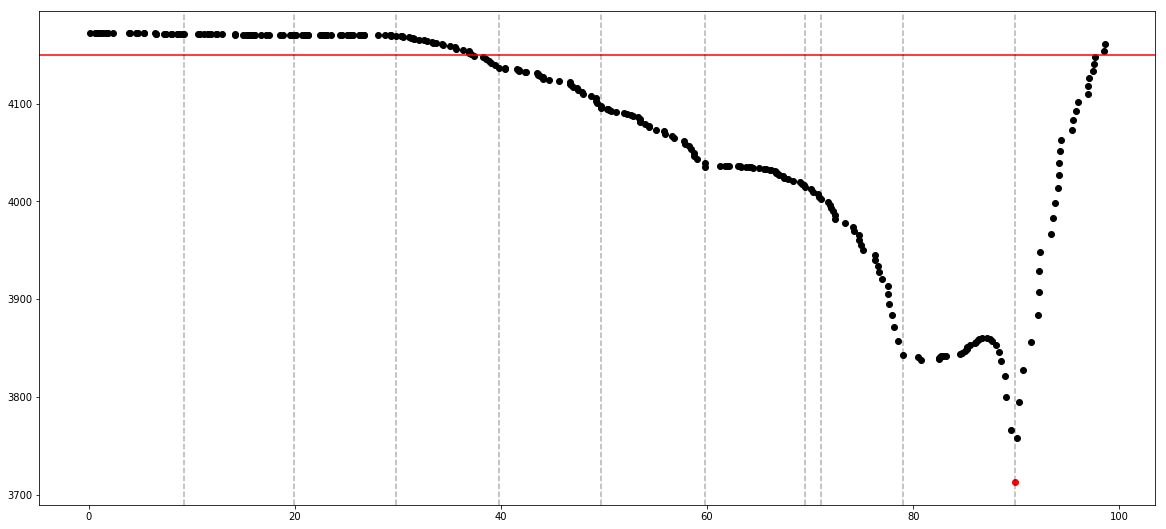

In [12]:
reg.plot_error()

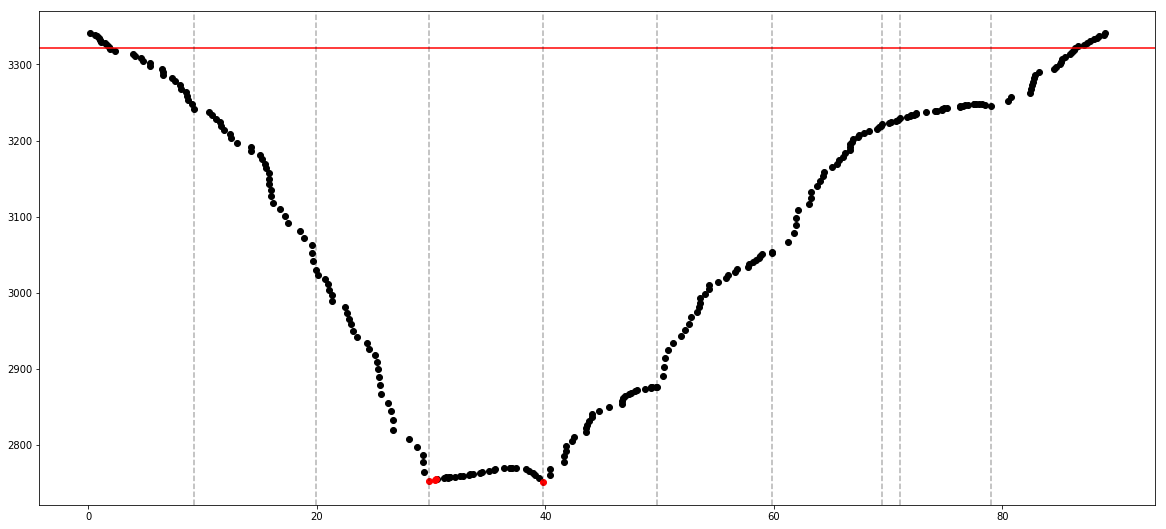

In [13]:
reg.left.plot_error()

In [14]:
reg.to_pandas()

,MSE,RSS,coefficient,intercept,max_x,min_x
0,1.012833,30.384980,2.876472,1.447479,9.265181,-inf
1,1.083532,32.505948,1.493014,7.968354,19.954227,9.265181
2,0.952084,28.562526,0.980270,5.542216,29.838533,19.954227
3,0.692405,20.772143,0.501132,4.948733,39.797980,29.838533
4,1.012685,30.380543,1.409183,5.316101,49.738370,39.797980
5,1.557354,46.720622,2.009381,3.547543,59.842358,49.738370
6,0.817752,24.532569,2.527390,7.083078,69.488745,59.842358
7,0.354924,1.774618,3.834897,-90.142947,71.065873,69.488745
8,1.193341,29.833513,2.508391,3.176317,79.011808,71.065873
9,0.952582,28.577463,3.059362,-2.272401,89.878925,79.011808
